In [51]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [76]:
X_test = pd.read_csv('../../dataset/preprocessed/X_test.csv')
y_test = pd.read_csv('../../dataset/preprocessed/y_test.csv').values.ravel()

In [101]:
X_train = pd.read_csv('../../dataset/preprocessed/X_train_res.csv')

In [102]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.44639591,  0.46853022,  0.16227819, ..., -0.49374768,
        -0.04467595, -0.56758832],
       [-0.18382781,  0.46853022,  0.45635702, ..., -0.49374768,
        -0.04467595, -0.56758832],
       [-1.60183119,  1.37443947,  1.04451468, ..., -0.49374768,
        -0.04467595, -0.56758832],
       ...,
       [-0.97160747, -1.34328827, -1.30811597, ...,  2.0250095 ,
        -0.04467595,  1.76184035],
       [ 0.76150777, -1.34328827, -1.01403714, ...,  2.0250095 ,
        -0.04467595, -0.56758832],
       [-1.60183119, -0.43737903, -0.42587947, ..., -0.49374768,
        -0.04467595, -0.56758832]])

In [103]:
X_test_scaled = scaler.transform(X_test)

# Raw Dataset

In [56]:
raw_model = joblib.load('./models/logreg_model_raw.pkl')

/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [57]:
raw_pred = raw_model.predict(X_test_scaled)
raw_pred = (raw_pred >= 0.5).astype(int)

/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
accuracy = accuracy_score(y_test, raw_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8388717083424458


In [59]:
print("Classification Report:")
print(classification_report(y_test, raw_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91  33525954
           1       0.88      0.14      0.24   7516590

    accuracy                           0.84  41042544
   macro avg       0.86      0.57      0.58  41042544
weighted avg       0.84      0.84      0.79  41042544



/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


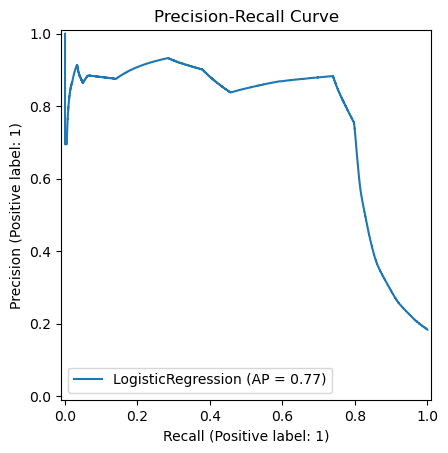

In [60]:
PrecisionRecallDisplay.from_estimator(raw_model, X_test_scaled, y_test)
plt.title("Precision-Recall Curve")
plt.show()

/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


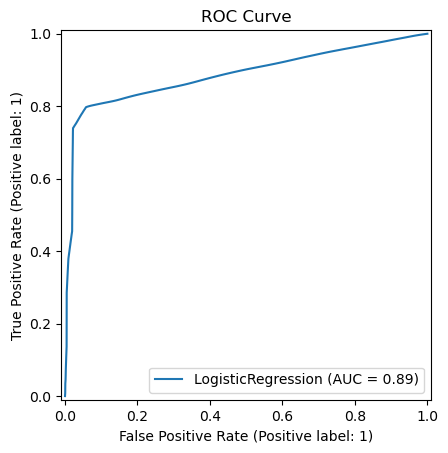

In [61]:
RocCurveDisplay.from_estimator(raw_model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

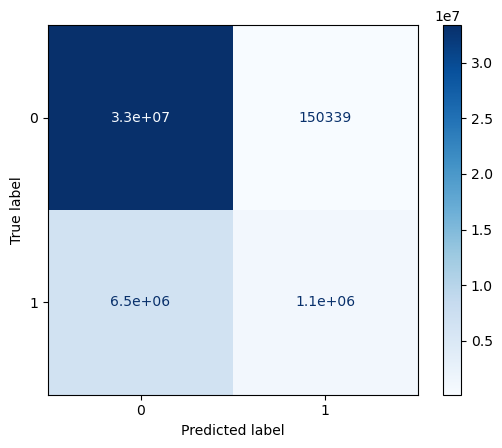

In [62]:
# Generate confusion matrix
cm = confusion_matrix(y_test, raw_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

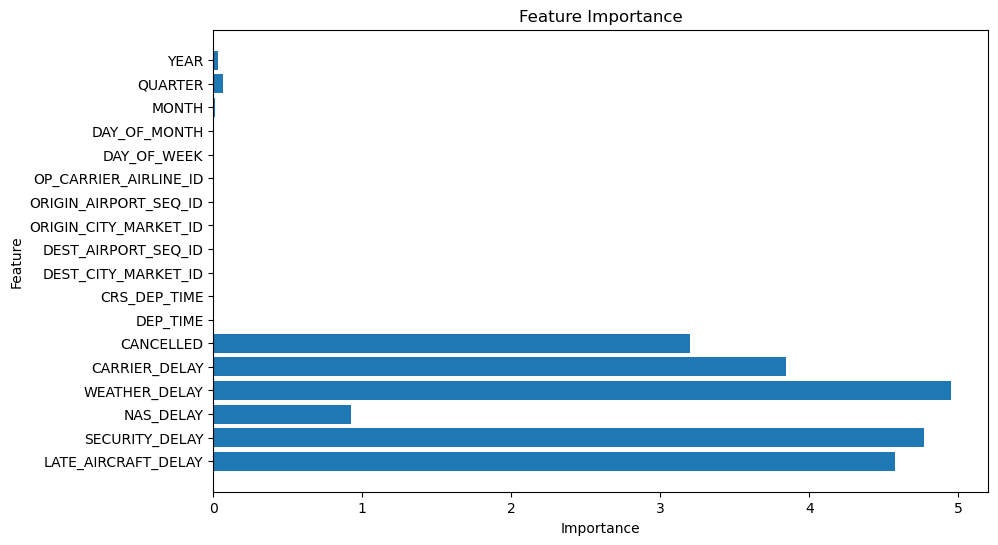

In [120]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': raw_model.coef_[0]
})
feature_importance['Importance'] = feature_importance['Importance'].abs()
feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Preprocess Dataset

In [104]:
preprocessed_model = joblib.load('./models/logreg_model_preprocessed.pkl')

/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [105]:
preprocessed_pred = preprocessed_model.predict(X_test_scaled)
preprocessed_pred = (preprocessed_pred >= 0.5).astype(int)

/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [106]:
accuracy = accuracy_score(y_test, preprocessed_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9343206405528858


In [84]:
accuracy = accuracy_score(y_test, preprocessed_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9343206405528858


In [67]:
print("Classification Report:")
print(classification_report(y_test, preprocessed_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96  33525954
           1       0.88      0.74      0.80   7516590

    accuracy                           0.93  41042544
   macro avg       0.91      0.86      0.88  41042544
weighted avg       0.93      0.93      0.93  41042544



/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


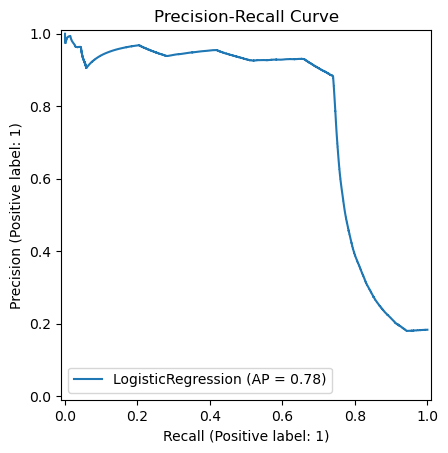

In [88]:
PrecisionRecallDisplay.from_estimator(preprocessed_model, X_test_scaled, y_test)
plt.title("Precision-Recall Curve")
plt.show()

/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


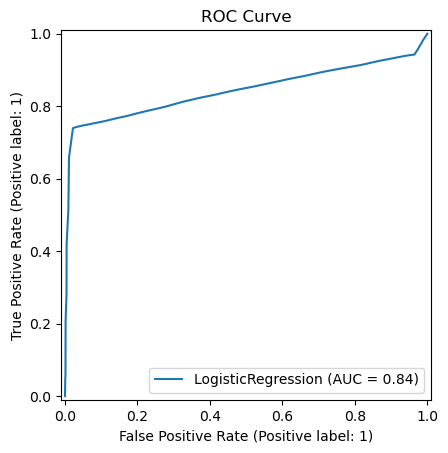

In [117]:
RocCurveDisplay.from_estimator(preprocessed_model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

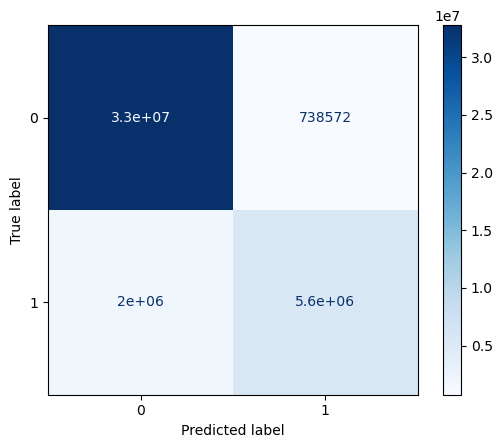

In [70]:
cm = confusion_matrix(y_test, preprocessed_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

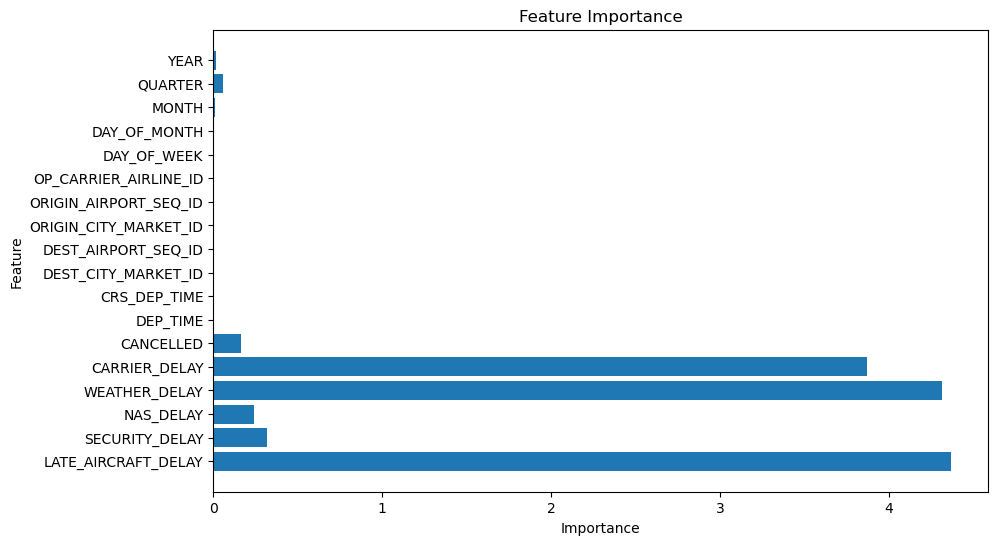

In [124]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': preprocessed_model.coef_[0]
})
feature_importance['Importance'] = feature_importance['Importance'].abs()
feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Without Top Dataset

In [108]:
wt_model = joblib.load('./models/logreg_model_w_out_top_features.pkl')

In [109]:
chi_features = ['ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'CRS_DEP_TIME',
       'DEP_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'LATE_AIRCRAFT_DELAY']
X_train_drop = X_train.drop(columns=chi_features)
X_test_drop = X_test.drop(columns=chi_features)
scaler.fit_transform(X_train_drop)
X_test_scaled_drop = scaler.transform(X_test_drop)

In [110]:
wt_pred = wt_model.predict(X_test_scaled_drop)
wt_pred = (wt_pred >= 0.5).astype(int)

/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [111]:
accuracy = accuracy_score(y_test, wt_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8173586169512299


In [96]:
print("Classification Report:")
print(classification_report(y_test, wt_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90  33525954
           1       0.69      0.00      0.01   7516590

    accuracy                           0.82  41042544
   macro avg       0.76      0.50      0.45  41042544
weighted avg       0.80      0.82      0.74  41042544



/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


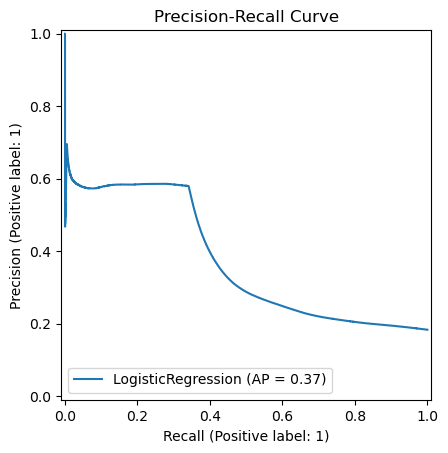

In [112]:
PrecisionRecallDisplay.from_estimator(wt_model, X_test_scaled_drop, y_test)
plt.title("Precision-Recall Curve")
plt.show()

/home/hice1/mphung8/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


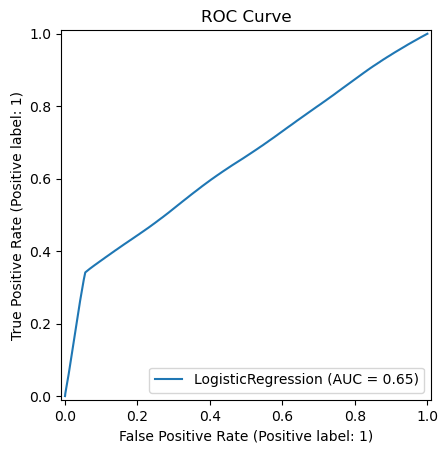

In [113]:
RocCurveDisplay.from_estimator(wt_model, X_test_scaled_drop, y_test)
plt.title("ROC Curve")
plt.show()

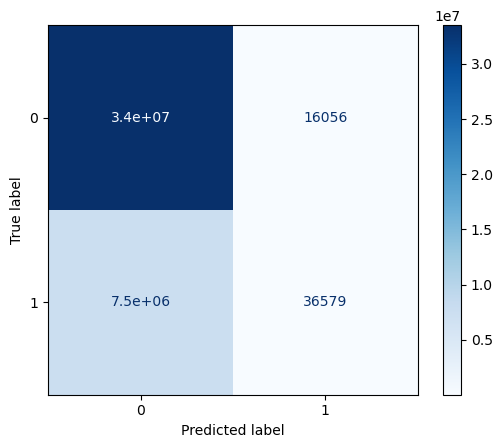

In [114]:
cm = confusion_matrix(y_test, wt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

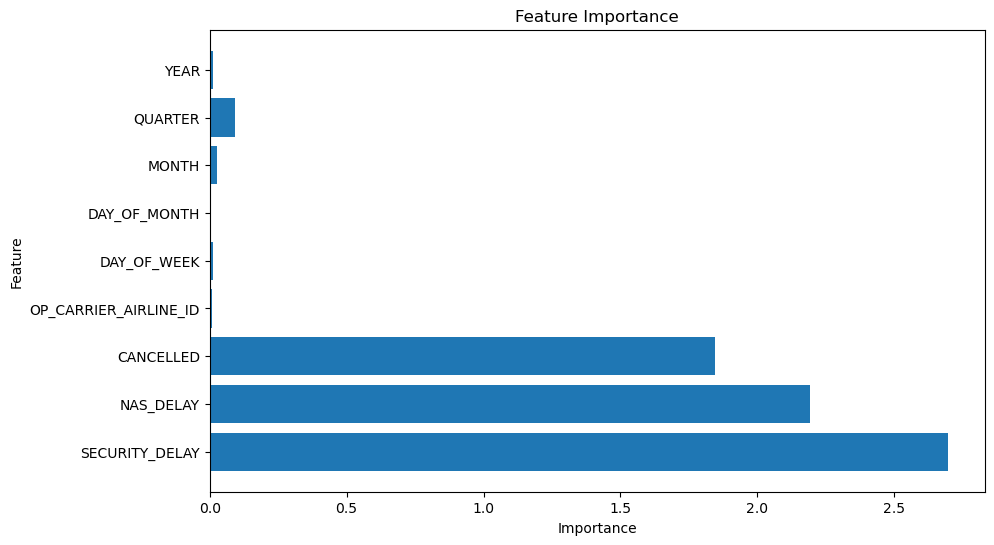

In [122]:
feature_importance = pd.DataFrame({
    'Feature': X_train_drop.columns,
    'Importance': wt_model.coef_[0]
})
feature_importance['Importance'] = feature_importance['Importance'].abs()
feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()